In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


[*********************100%***********************]  1 of 1 completed


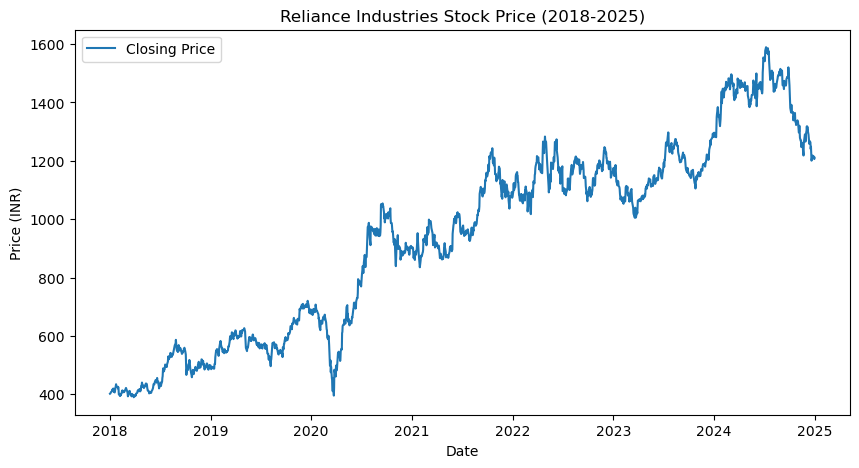

In [4]:
# Fetch last 5 years of data
df = yf.download("RELIANCE.NS", start="2018-01-01", end="2025-01-01", auto_adjust=True)
# Plot closing prices
plt.figure(figsize=(10,5))
plt.plot(df["Close"], label="Closing Price")
plt.title("Reliance Industries Stock Price (2018-2025)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2018-01-01,401.864807,407.585208,400.870911,407.585208,9453202
2018-01-02,402.483246,406.193799,400.385024,403.300454,9499419
2018-01-03,404.095490,409.042883,403.322453,408.601135,13507800
2018-01-04,406.525024,407.187631,404.493061,405.575300,9008932
2018-01-05,407.828156,409.440487,406.502971,407.187664,7441284


In [6]:
data=df[['Close']]

In [7]:
data.head()

Price,Close
Ticker,RELIANCE.NS
Date,
2018-01-01,401.864807
2018-01-02,402.483246
2018-01-03,404.095490
2018-01-04,406.525024
2018-01-05,407.828156


In [10]:
#Scaling the close price b/w range of 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [11]:
lookback = 60  # past 60 days
X, y = [], []

for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [12]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [13]:
train_size = int(len(X)*0.8)  # 80% training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # 20% dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Predict next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
model.save("lstm_model.h5")

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0233 - val_loss: 0.0083
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023 - val_loss: 9.6279e-04
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss:

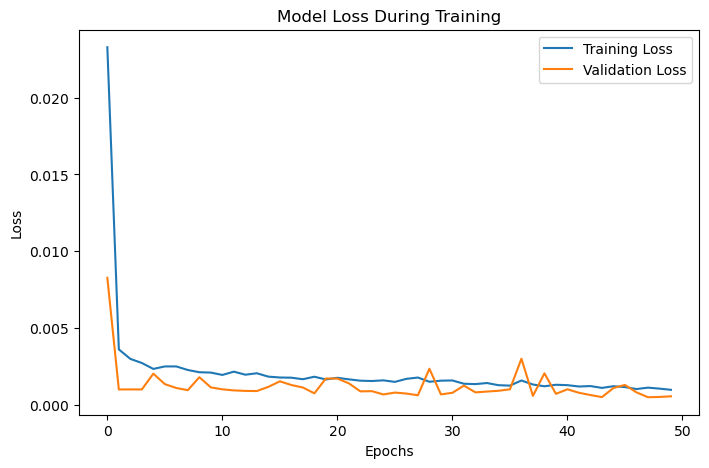

In [15]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
predicted_prices = model.predict(X_test)

# Inverse transform to get actual price values
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step 


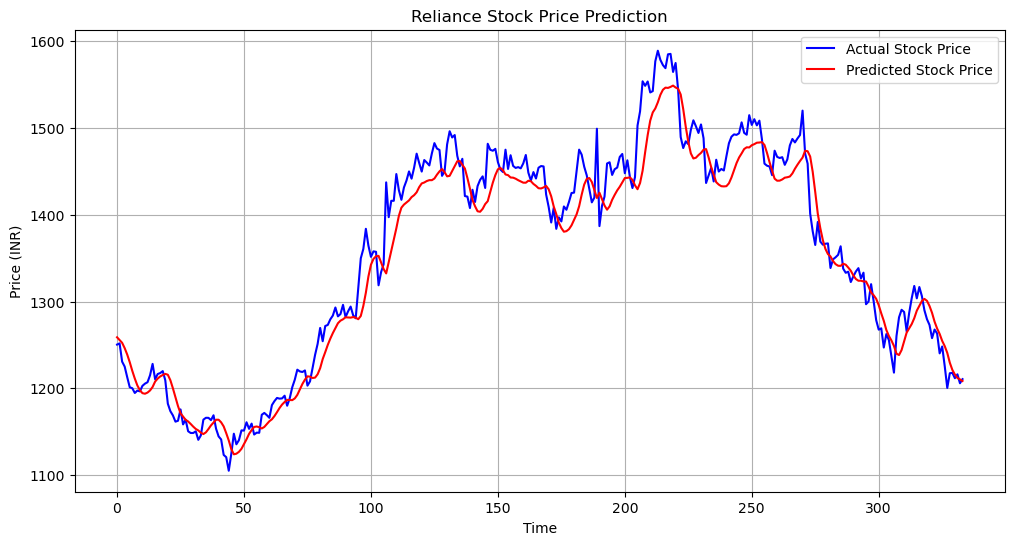

In [17]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test_actual, predicted_prices)
mae = mean_absolute_error(y_test_actual, predicted_prices)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 809.01
Root Mean Squared Error: 28.44
Mean Absolute Error: 22.34


In [19]:
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape(1, -1, 1)

next_day_price = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_price)
print(f"Predicted Next Day Price: {next_day_price[0][0]:.2f} INR")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Next Day Price: 1207.70 INR
